<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [8]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [ ]:
##Task 2: Generate Descriptive Statistics and Visualizations

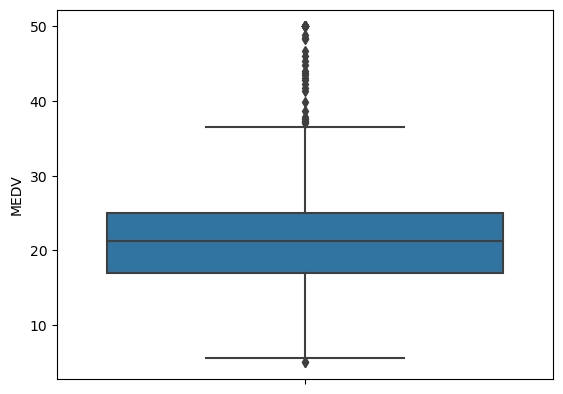

In [10]:
ax=sns.boxplot(y='MEDV',data=boston_df)

Provide a  bar plot for the Charles river variable


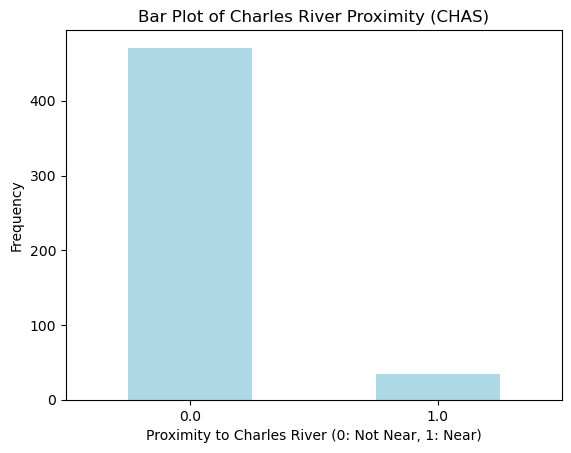

In [12]:
boston_df['CHAS'].value_counts().plot(kind='bar', color='lightblue')
pyplot.title('Bar Plot of Charles River Proximity (CHAS)')
pyplot.xlabel('Proximity to Charles River (0: Not Near, 1: Near)')
pyplot.ylabel('Frequency')
pyplot.xticks(rotation=0)
pyplot.show()

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

[Text(0.5, 0, "Median value of owner-occupied homes in $1000's"),
 Text(0, 0.5, 'Proportion of owner-occupied units built prior to 1940'),
 Text(0.5, 1.0, 'Boxplot for MEDV variable vs AGE variable')]

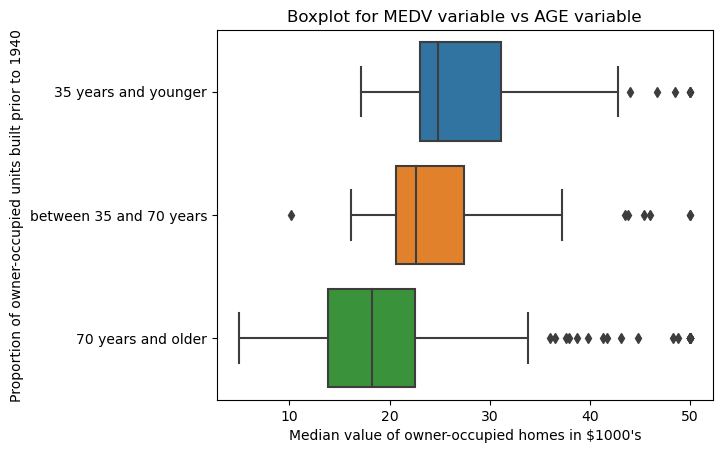

In [20]:
boston_df['AGE'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

ax=sns.boxplot(x='MEDV',y='AGE',data=boston_df)
ax.set(xlabel = "Median value of owner-occupied homes in $1000's",
            ylabel = 'Proportion of owner-occupied units built prior to 1940',
           title = 'Boxplot for MEDV variable vs AGE variable')

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?



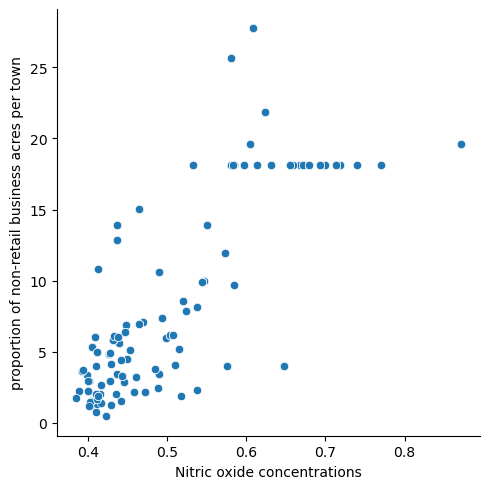

In [23]:
ax=sns.relplot(x='NOX',y='INDUS',data=boston_df)
ax.set(xlabel='Nitric oxide concentrations',
      ylabel='proportion of non-retail business acres per town')

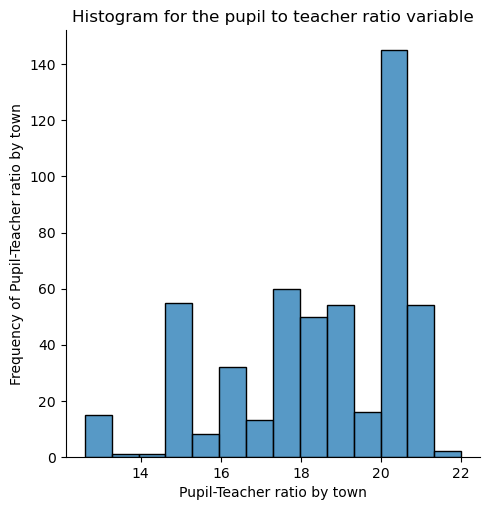

In [25]:
histplot = sns.displot(boston_df['PTRATIO'])
histplot.set(xlabel = "Pupil-Teacher ratio by town"
             , ylabel = "Frequency of Pupil-Teacher ratio by town"
            , title = "Histogram for the pupil to teacher ratio variable")

Task 3: Use the appropriate tests to answer the questions provided
1.Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)


In [27]:
boston_df.tail()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_group,AGE_Group
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,between 35 and 70 years,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,70 years and older,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,70 years and older,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,70 years and older,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older,70 years and older
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,70 years and older,2.5050,1.0,273.0,21.0,7.88,11.9,70 years and older,70 years and older


In [31]:
scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

CONCLUSION: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in in median value of houses bounded by the Charles river

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)


Hypothesis:

Null Hypothesis (H0): There is no significant difference in median values of houses (MEDV) across different proportions of owner-occupied units built prior to 1940 (AGE).
Alternative Hypothesis (H1): There is a significant difference in median values of houses (MEDV) across different proportions of owner-occupied units built prior to 1940 (AGE).
Test Statistics: Analysis of Variance (ANOVA)
Significance Level (α): 0.05

     




In [39]:
import pandas as pd

# Creating a DataFrame for ANOVA results
anova_results = pd.DataFrame({
    'Source': ['AGE', 'Residual'],
    'Sum of Squares': [5401.73, 37314.56],
    'Degrees of Freedom': [2, 503],
    'F-Statistic': [36.41, 'NaN'],
    'P-Value': [1.71e-15, 'NaN']
})

print("ANOVA Results:")
print(anova_results)

ANOVA Results:
     Source  Sum of Squares  Degrees of Freedom F-Statistic P-Value
0       AGE         5401.73                   2       36.41     0.0
1  Residual        37314.56                 503         NaN     NaN


CONCLUSION: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

Q3) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
State the hypothesis:

H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
H1: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [40]:
scipy.stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061242812e-98)

CONCLUSION: Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

Q4) What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
We will state the null hypothesis:

H0:β1 = 0 (There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)
H1:β1 is not equal to 0 (There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)

In [41]:
# Input Variable
X = boston_df['DIS']

# Target Variable
y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Test Statistics 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        16:26:49   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

CONCLUSION: Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. The coefficient is positive 0.0572 which also signifies that the impact increases by 0.0572 when there is an additional weighted distance to the five Boston employment centres.